In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('events.csv',low_memory=False)

In [4]:
df['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [5]:
dfPerEv=df.loc[:,['event','person']]

In [6]:
#Verifico que la cantidad de personas no nulas equivalga a la cantidad de eventos totales 1 a 1:
print('La cantidad de veces que aparece una persona no nula es: ' + str(dfPerEv['person'].count()))
print('La cantidad de veces que aparece un evento no nulo es: ' + str(dfPerEv['event'].count()))
print('La cantidad de eventos es: ' + str(df['event'].size))
print('La cantidad de personas individuales es: ' + str(dfPerEv['person'].nunique()))
dfPerEv['evRealiz']=1
print('Cada persona realiza la siguiente cantidad de eventos: ')
dfPerEv['person'].value_counts().head(10)

La cantidad de veces que aparece una persona no nula es: 1011288
La cantidad de veces que aparece un evento no nulo es: 1011288
La cantidad de eventos es: 1011288
La cantidad de personas individuales es: 27624
Cada persona realiza la siguiente cantidad de eventos: 


71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

In [7]:
print('Las personas realizan estos eventos: ')
grupPerEv=dfPerEv.groupby(['person','event']).count().unstack()
grupPerEv['suma']=grupPerEv.loc[:,:].sum(axis = 1)
grupPerEv.sort_values(by='suma',ascending=False,inplace=True)
grupPerEv=grupPerEv.stack()
grupPerEv=grupPerEv.drop('suma',axis=1)
grupPerEv=grupPerEv.dropna()
grupPerEv

Las personas realizan estos eventos: 


evRealiz
person   event                      
71492f2b ad campaign hit        61.0
         brand listing        1149.0
         checkout                3.0
         generic listing        71.0
         lead                    1.0
         searched products      15.0
         staticpage              4.0
         viewed product       1364.0
         visited site          103.0
6b07be7b ad campaign hit        59.0
         brand listing         780.0
         checkout               13.0
         conversion              6.0
         generic listing       424.0
         search engine hit       6.0
         searched products      87.0
         staticpage             14.0
         viewed product       1118.0
         visited site          263.0
285101a1 ad campaign hit        74.0
         brand listing         657.0
         checkout                7.0
         conversion              1.0
         generic listing       244.0
         search engine hit      12.0
         searched products       7.0
         viewed product       1077.0
         visited site           61.0
3e34b3cf ad campaign hit         4.0
         brand listing          36.0
...                              ...
1601d178 checkout                1.0
4e67d346 checkout                1.0
cb3f2831 checkout                1.0
15d276b0 checkout                1.0
e33c4ebc checkout                1.0
a20ecf2c checkout                1.0
15acc378 checkout                1.0
cb9a1197 checkout                1.0
cbadb824 checkout                1.0
157704b2 checkout                1.0
1566b538 checkout                1.0
a3a1946b checkout                1.0
4dc43d43 checkout                1.0
4a6b2b55 checkout                1.0
4be8d5bc checkout                1.0
4aac2b8d checkout                1.0
4b2a85f2 checkout                1.0
f27ac48f checkout                1.0
a4afb582 checkout                1.0
4bab674f checkout                1.0
ca5a2f18 checkout                1.0
4ce14878 checkout                1.0
166e650c checkout                1.0
4ce1d74f checkout                1.0
a437a6b3 checkout                1.0
4d0a2de2 checkout                1.0
4d5c3c8c checkout                1.0
caea4dc3 checkout                1.0
4da04c89 checkout                1.0
3f2d70d0 checkout                1.0

[155483 rows x 1 columns]

### Es curioso que la persona que mas eventos realizo no hizo ninguna conversion, mientras que el que le sigue en numero de acciones realizo 6

In [8]:
print('Hay esta cantidad de personas que realizan 1 solo evento: ')
grupPerEv=dfPerEv.groupby(['person','event']).count().unstack()
grupPerEv['suma']=grupPerEv.loc[:,:].sum(axis = 1)
grupPerUnicEv=grupPerEv.loc[grupPerEv['suma'] == 1.0,:]
grupPerUnicEv=grupPerUnicEv.reset_index()
grupPerUnicEv['person'].nunique()

Hay esta cantidad de personas que realizan 1 solo evento: 


471

#### Mmm mira con la cara que te mira Connan, aunque 471 personas sean muy pocas comparados con el total de personas (27624), viendolos como individuos 471 personas que realizaron una unica accion es algo que no se ve bien. Una primera hipotesis es que esta gente utiliza algun proxy o algo que permita evitar ser identificado por el motor de google analitycs.

In [9]:

#EJECUTAR ESTA LINEA UNA SOLA VEZ DESPUES DE HABER EJECUTADO LA ANTERIOR

grupPerUnicEv=grupPerUnicEv.stack()
grupPerUnicEv=grupPerUnicEv.reset_index()

In [10]:
print('Estas son los eventos que son realizados por las personas que realizan una accion: ')
grupPerUnicEv['event'].value_counts()

Estas son los eventos que son realizados por las personas que realizan una accion: 


checkout    471
            471
Name: event, dtype: int64

### Entonces el 100% de las personas que realizaron una sola accion en la pagina fue para realizar un checkout (Es decir, empezar el proceso de pago de la compra de uno o varios productos que se encuentren en el carrito). Lo que quiere decir que las personas que realizaron una conversion realizaron al menos 1 accion mas.

# Representacion grafica de la cantidad de personas en funcion de la cantidad de acciones que realizo cada persona

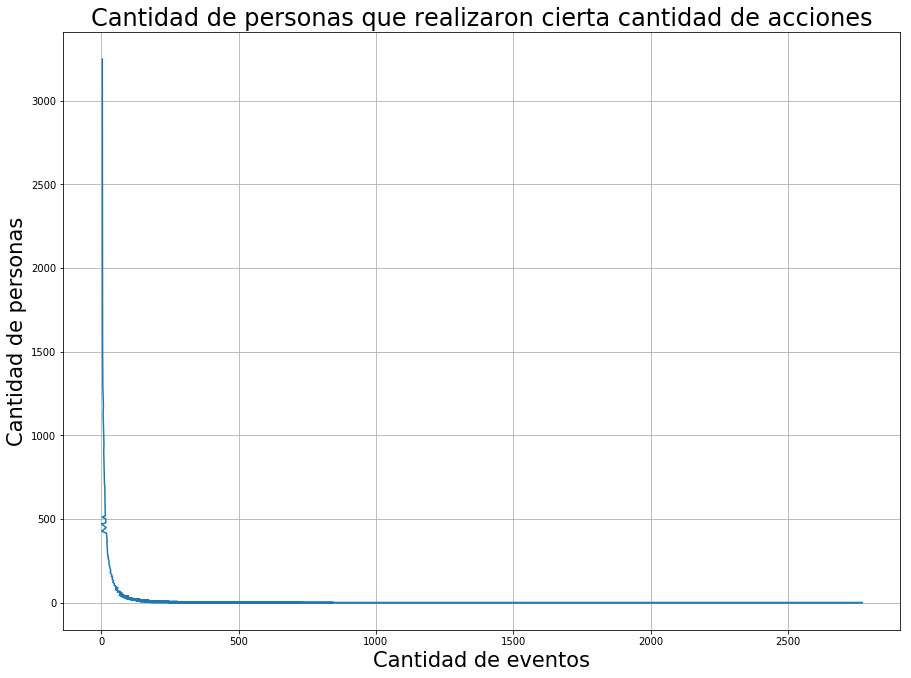

In [11]:

cant=grupPerEv['suma'].value_counts()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=11
plt.rcParams["figure.figsize"] = fig_size

plt.plot(cant)
plt.grid()
plt.title('Cantidad de personas que realizaron cierta cantidad de acciones',size=24)
plt.xlabel('Cantidad de eventos',size=21)
plt.ylabel('Cantidad de personas',size=21)
plt.show()

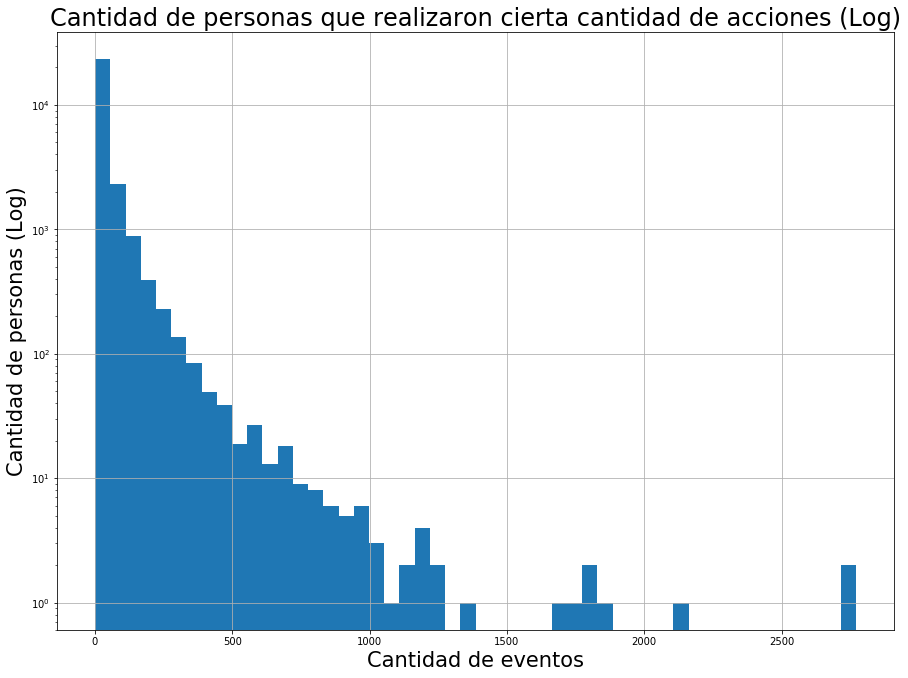

In [12]:
x = grupPerEv['suma']
plt.hist(x,bins=50)
plt.grid()
plt.title('Cantidad de personas que realizaron cierta cantidad de acciones (Log)',size=24)
plt.xlabel('Cantidad de eventos',size=21)
plt.ylabel('Cantidad de personas (Log)',size=21)
plt.yscale('log')
plt.show()

# Cantidad de personas que realizan entre 1 y 30 acciones

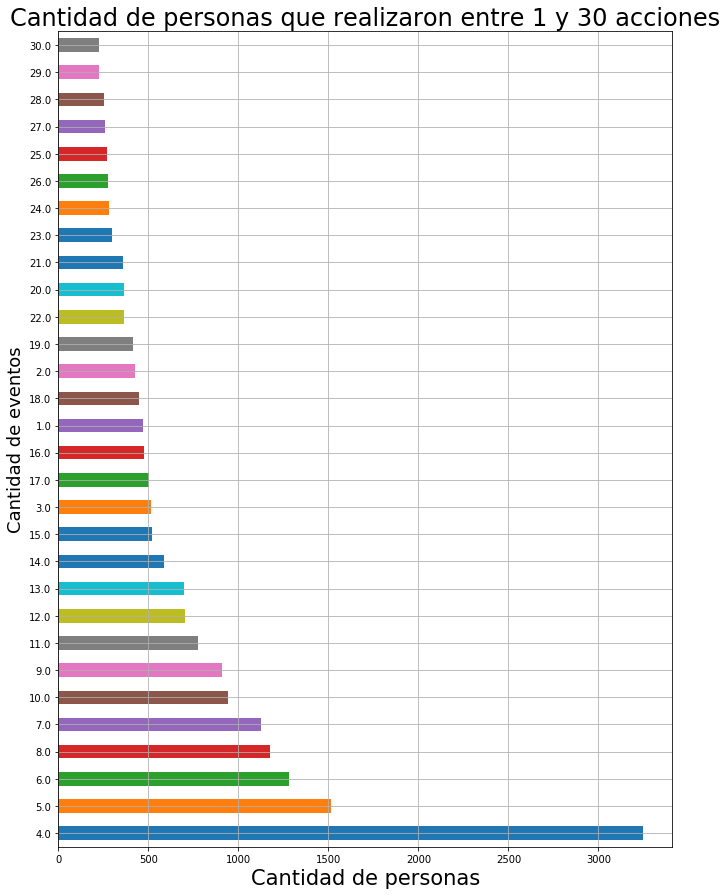

In [13]:
grupHasta30Ev=grupPerEv.loc[grupPerEv['suma'] <= 30.0]
x=grupHasta30Ev['suma'].value_counts()
plt2 = x.plot(kind = 'barh', grid=True,figsize = (11,15))
plt2.set_title("Cantidad de personas que realizaron entre 1 y 30 acciones",size=24)
plt2.set_xlabel("Cantidad de personas",fontsize = 21)
plt2.set_ylabel("Cantidad de eventos",fontsize = 18)
plt2



#.bar(x)
#plt.grid()
#plt.title('Cantidad de personas que realizaron entre 1 y 30 acciones',size=24)
#plt.xlabel('Cantidad de eventos',size=21)
#plt.ylabel('Cantidad de personas',size=21)
#plt.yscale('log')
#plt.show()

In [14]:
print('La de personas que realizan entre 1 y 30 eventos es: ' + str(x.mean()))
print('La desviacion estandar entre las personas que realizan 1 y 30 eventos es: ' + str(x.std()))
print('La suma de la media mas el desvio/2 es: ' + str((x.mean()) + ((x.std())/2)))
print('Las 7 cantidades mas populares de acciones realizadas por las personas que entran a la pagina: ')
grupHasta30Ev['suma'].value_counts().head(7)

La de personas que realizan entre 1 y 30 eventos es: 663.2666666666667
La desviacion estandar entre las personas que realizan 1 y 30 eventos es: 596.2860880907542
La suma de la media mas el desvio/2 es: 961.4097107120438
Las 7 cantidades mas populares de acciones realizadas por las personas que entran a la pagina: 


4.0     3248
5.0     1514
6.0     1282
8.0     1178
7.0     1126
10.0     943
9.0      909
Name: suma, dtype: int64

## Por lo que se puede ver que la mayor parte de la gente que entra realiza entre 4 y 10 acciones en la pagina, ahora se va a buscar encontrar cuales son esas acciones que realizan en ma 

In [15]:
grupEntre4y10Ev=grupPerEv.loc[grupPerEv['suma'] <= 10.0]
grupEntre4y10Ev=grupEntre4y10Ev.loc[4.0 <= grupEntre4y10Ev['suma']]
grupEntre4y10Ev.groupby('suma').count()

evRealiz                                                         \
event ad campaign hit brand listing checkout conversion generic listing lead   
suma                                                                           
4.0              2966            17     3248          6              80    0   
5.0              1187           100     1514          8             329    8   
6.0               965           212     1282          6             559    4   
7.0               804           250     1126          5             531    3   
8.0               889           287     1178          9             523    0   
9.0               657           252      909          2             487    1   
10.0              708           249      943          2             520    1   

                                                                     \
event search engine hit searched products staticpage viewed product   
suma                                                                  
4.0                 142                 9          3           3234   
5.0                 986                26          1           1505   
6.0                 736               100          6           1278   
7.0                 650               177          9           1123   
8.0                 732               180          7           1173   
9.0                 591               172          8            909   
10.0                604               191         18            943   

                    
event visited site  
suma                
4.0           3233  
5.0           1496  
6.0           1264  
7.0           1113  
8.0           1171  
9.0            902  
10.0           937

### Se puede ver comparando esta tabla con el cuadro anterior que por ejemplo que el 100% de las personas que realizaron 4, 5, 6, 7, 8, 9 y 10 acciones realizaron un checkout cada vez pues el numero de checkouts realizados coincide con la cantidad de gente que realiza cada combinacion de suma (FALACIA: PUEDE SER QUE UNA PERSONA HAYA HECHO 3 CHECKOUTS SOLA Y QUE JUSTO LA SUMA DE LA CANTIDAD DE PERSONAS QUE REALIZARON 4 ACCIONES, IMPROBABLE PERO NO IMPOSIBLE)

In [16]:
DEAL DE ACCIONES REALIZADAS POR USUARIO PROMEDIO Y VER CUALES SON 
## ESAS ACCIONES QUE REALIZA PARA LUEGO DECIDIR SI "LO QUE FUNCIONA NO SE TOCA" O SI SE
## PUEDE HACER ALGO PARA RETENER A LA GENTE MAS TIEMPO EN LA PAGINA CAMBIANDO ALGUNA COSA.

SyntaxError: invalid syntax (<ipython-input-16-da5684d0fdc6>, line 1)